1. Интерполяция в форме Лагранжа. 
2. Интерполяция в форме Ньютона.
3. Кубические слайсы.

## Лабораторная работа 4 "Интерполяция". Шаргин Иван

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import math
from functools import reduce

## 1. Интерполяция в форме Лагранжа

In [81]:
def Lagrange_interpolation(x_arr, f_arr, area):
    '''возвращает значения интерполяционного многочлена на точках множества area'''
    Polynom_on_area = []
    for x in area:
        P = 0 
        for i in range(f_arr.size):
            multipliers = [(x-x_arr[j]) / (x_arr[i] - x_arr[j]) for j in range(x_arr.size) if i != j]
            l_i = reduce(lambda x, y: x * y, multipliers)
            P += f_arr[i] * l_i
        Polynom_on_area.append(P)
    
    return(np.array(Polynom_on_area))

In [82]:
def f_test(x):
    return np.sin(x) / x

error:
2.1291220900622703


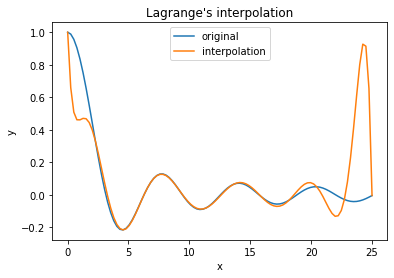

In [364]:
x = np.linspace(0.01, 25, 100)
y = f_test(x)
plt.plot(x, y, label = 'original')
plt.xlabel('x')
plt.ylabel('y')

x_arr = np.linspace(0.01, 25, 12)
f_arr = f_test(x_arr)
area = x
interpolation = Lagrange_interpolation(x_arr, f_arr, area)
plt.plot(area, interpolation, label = 'interpolation')
plt.legend()
plt.title("Lagrange's interpolation")

print('error:')
print(np.linalg.norm(y - interpolation))

## 2. Интерполяция в форме Ньютона

In [84]:
def divided_difference(x_arr, f_arr):
    '''возвращает разделенную разность'''
    N = x_arr.size
    F = 0
    if N == 1:
        return f_arr[0]
    for j in range(N):
        denominator_parts = [x_arr[j] - x_arr[i] for i in range(N) if i != j]
        denominator = reduce(lambda x, y: x * y, denominator_parts)
        F += f_arr[j] / denominator
    
    return F          

In [85]:
x_arr = np.array([1, 2])
f_arr = np.array([10, 25])
divided_difference(x_arr, f_arr)

15.0

In [86]:
def Newton_interpolation_one_point(x_arr, f_arr, x):
    '''возвращает значение интерполяционного многочлена на точке x'''
    N = x_arr.size
    P = 0
    for i in range(N):
        if i == 0:
            P += f_arr[i]
        else:
            multipliers = [x - x_arr[j] for j in range(i)]
            m = reduce(lambda x, y: x * y, multipliers)
            P += divided_difference(x_arr[0:i + 1], f_arr[0:i + 1]) * m
    return P        

In [87]:
Newton_interpolation_one_point(x_arr, f_arr, 0)

-5.0

In [88]:
def Newton_interpolation(x_arr, f_arr, area):
    '''возвращает значения интерполяционного многочлена на множестве area'''
    return np.array(Newton_interpolation_one_point(x_arr, f_arr, area))        

In [89]:
x = np.array([1, 2, 3])
print(x[0:1+1])

[1 2]


Text(0.5, 1.0, "Newton's interpolation")

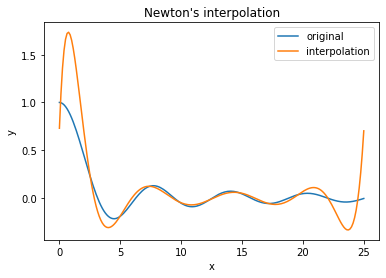

In [357]:
x = np.linspace(0.01, 25, 200)
y = f_test(x)
plt.plot(x, y, label = 'original')
plt.xlabel('x')
plt.ylabel('y')

x_arr = np.linspace(0.1, 24.5, 11)
f_arr = f_test(x_arr)
area = x
interpolation = Newton_interpolation(x_arr, f_arr, area)
plt.plot(area, interpolation, label = 'interpolation')
plt.legend()
plt.title("Newton's interpolation")

Теперь реализуем добавление еще одной точки

In [91]:
def Newton_interpolation_add_point(area, interpolation, x_new, f_new, x_arr, f_arr):
    '''Добавляет точку к интерполяции в форме Ньютона'''
    x_arr = np.hstack((x_arr, np.array([x_new])))
    f_arr = np.hstack((f_arr, np.array([f_new])))
    for i in range(area.size):
        multipliers = [area[i] - x_arr[j] for j in range(x_arr.size - 1)]
        m = reduce(lambda x, y: x * y, multipliers)
        interpolation[i] += divided_difference(x_arr, f_arr) * m
    
    return interpolation

Text(0.5, 1.0, "Newton's interpolation")

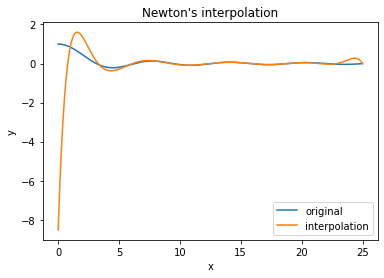

In [358]:
x = np.linspace(0.01, 25, 200)
y = f_test(x)
plt.plot(x, y, label = 'original')
plt.xlabel('x')
plt.ylabel('y')

x_arr = np.linspace(1, 25, 11)
f_arr = f_test(x_arr)
area = x
old_interpolation = Newton_interpolation(x_arr, f_arr, area)
plt.plot(area, old_interpolation, label = 'interpolation')
plt.legend()
plt.title("Newton's interpolation")

error:
3.445228147224965


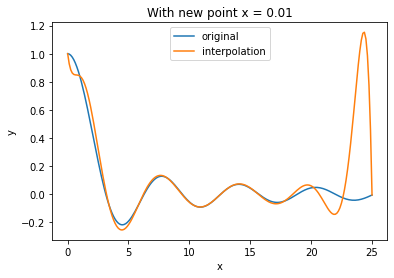

In [359]:
x = np.linspace(0.01, 25, 200)
y = f_test(x)
plt.plot(x, y, label = 'original')
plt.xlabel('x')
plt.ylabel('y')

interpolation = Newton_interpolation_add_point(area, old_interpolation, 0.01, f_test(0.01), x_arr, f_arr)
plt.plot(area, interpolation, label = 'interpolation')
plt.legend()
plt.title("With new point x = 0.01")
print('error:')
print(np.linalg.norm(y - interpolation))

## 3. Кубические сплайны

In [388]:
def diags_3(A, f):
    """Функция реализует метод прогонки СЛАУ.
    Принимает матрицу А левой части и вектор f правой части. 
    Возвращает вектор решения"""
    N = A.shape[0]
    d = f
    c = np.diagonal(A, offset=1)
    b = np.diagonal(A)
    a = np.diagonal(A, offset=-1)
    
    L = np.tril(A, k=-2)
    U = np.triu(A, k=2)
    if np.linalg.norm(L) > 0 or np.linalg.norm(U) > 0:
        print("Not 3x diagonal matrix!")
        return(-1)
    
    answer = [0] * N
    y = []
    y.append(b[0])
    alpha = []
    alpha.append(-c[0] / y[0])
    beta = []
    beta.append(d[0]/y[0])
    
    for i in range(1, N-1):
        y.append(b[i] + a[i-1] * alpha[-1])
        alpha.append(-c[i] / y[-1])
        beta.append((d[i] - a[i-1] * beta[-1]) / y[-1])
    y.append(b[N-1] + a[N-2] * alpha[-1])
    beta.append((d[N-1] - a[N-2] * beta[-1]) / y[-1])
    
    answer[-1] = beta[-1]
    for i in range(N-2, -1, -1):
        answer[i] = alpha[i] * answer[i+1] + beta[i]
    answer = np.array(answer)

    return(answer)  

In [383]:
def Cube_Splines(x_arr, f_arr, A):
    '''возвращает значения интерполяции кубическими сплайнами'''
    N = x_arr.size - 1
    a = f_arr

    h = np.array([x_arr[i+1] - x_arr[i] for i in range(N)])
    
    for j in range(N-1):
        new_row = np.array([2 * (h[i] + h[i+1]) if i==j else h[i] if i==j-1  
                            else h[i+1] if i==j+1 else 0 for i in range(N-1)])
        if j == 0:
            M_c = new_row
        else:
            M_c = np.vstack((M_c, new_row))
    
    right_c = 3 * np.array([(a[i+1] - a[i]) / h[i] - (a[i] - a[i-1]) / h[i] 
                            for i in range(1, N)])
    right_c = right_c.reshape(-1, 1)

    c = np.zeros(N+1)
    answer = diags_3(M_c, right_c).reshape((N-1,))
    c[1:-1] = answer 
    
    b = np.array([(a[i] - a[i-1]) / h[i-1] - (2 * c[i] + c[i-1]) / 3 * h[i-1] for i in range(1, N+1)])
    d = np.array([(c[i] - c[i-1]) / 3 / h[i] if i != 0 else c[0] / 3 /h[0] for i in range(N)])
    
    interpolation = np.array([])
    for i in range(N):
        area = np.linspace(x_arr[i], x_arr[i+1], A)
        P_cube = a[i] + b[i] * (area - x_arr[i])
        P_cube += c[i + 1] * np.square(area - x_arr[i])
        P_cube += d[i] * np.power(area - x_arr[i], 3)
        interpolation = np.hstack((interpolation, P_cube))
    return interpolation
        

Text(0.5, 1.0, 'Cube splines interpolation')

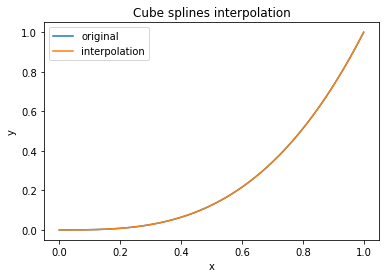

In [386]:
A = 100
Z = 40
x = np.linspace(0., 1., (Z-1) * A)
y = np.power(x, 3)
plt.plot(x, y, label = 'original')
plt.xlabel('x')
plt.ylabel('y')

x_arr = np.linspace(0., 1., Z)
f_arr = np.power(x_arr, 3)
interpolation = Cube_Splines(x_arr, f_arr, A)
plt.plot(x, interpolation, label = 'interpolation')
plt.legend()
plt.title("Cube splines interpolation")


error:
0.12928958642935665


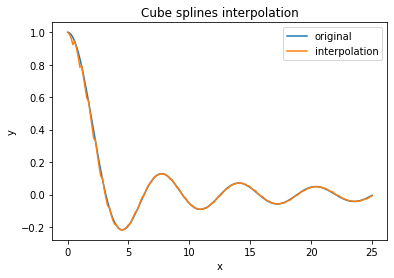

In [387]:
A = 4
Z = 45
x = np.linspace(0.01, 25, (Z-1) * A)
y = f_test(x)
plt.plot(x, y, label = 'original')
plt.xlabel('x')
plt.ylabel('y')

x_arr = np.linspace(0.01, 25, Z)
f_arr = f_test(x_arr)
interpolation = Cube_Splines(x_arr, f_arr, A)
plt.plot(x, interpolation, label = 'interpolation')
plt.legend()
plt.title("Cube splines interpolation")

print('error:')
print(np.linalg.norm(y - interpolation))

In [381]:
def Cube_Splines(x_arr, f_arr, A):
    '''возвращает значения интерполяции кубическими сплайнами на множестве area'''
    N = x_arr.size - 1
    a = f_arr

    h = np.array([x_arr[i+1] - x_arr[i] for i in range(N)])
    
    for j in range(N-1):
        new_row = np.array([2 * (h[i] + h[i+1]) if i==j else h[i] if i==j-1  
                            else h[i+1] if i==j+1 else 0 for i in range(N-1)])
        if j == 0:
            M_c = new_row
        else:
            M_c = np.vstack((M_c, new_row))
    
    right_c = 3 * np.array([(a[i+1] - a[i]) / h[i] - (a[i] - a[i-1]) / h[i] 
                            for i in range(1, N)])
    right_c = right_c.reshape(-1, 1)

    c = np.zeros(N+1)
    answer = diags_3(M_c, right_c).reshape((N-1,))
    c[1:-1] = answer 
    
    b = np.array([(a[i] - a[i-1]) / h[0] - (2 * c[i] + c[i-1]) / 3 * h[0] if i != 0 else 0 for i in range(N+1)])
    d = np.array([(c[i] - c[i-1]) / 3 / h[0] if i > 1 
                  else c[0] / 3 /h[0] if i == 1 
                  else c[0] for i in range(N+1)])
    
    interpolation = np.array([])
    for i in range(1, N+1):
        area = np.linspace(x_arr[i-1], x_arr[i], A)
        P_cube = a[i] + b[i] * (area - x_arr[i-1])
        P_cube += c[i] * np.square(area - x_arr[i-1])
        P_cube += d[i] * np.power(area - x_arr[i-1], 3)
        interpolation = np.hstack((interpolation, P_cube))
    return interpolation
        